In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, comb
from mpl_toolkits import mplot3d
import ipympl
%matplotlib widget


In [16]:
points = np.array([[0.0, 0.0, 0.0],
                   [1.0169,
                    1.40575,
                    -0.994878],
                   [1.85294,
                    2.29963,
                    0.586899
                    ],
                   [0.959878,
                    3.07578,
                    2.19936],
                   [1.19476,
                    4.47883,
                    3.60516
                    ],
                   [2.64501,
                    5.8466,
                    3.76631
                    ],
                    [3.85277,
                   6.55501,
                   2.33821]
                   ,[ 5.29251,
                   7.02947,
                   3.64283]
                   ,[ 6.06737,
                   8.83467,
                   3.26754]
                   ,[  7.6291,
                   8.15817,
                   4.31795]
                   ,[10,
                   10,
                   2]])
points = np.flipud(points)

In [17]:
# https://en.wikipedia.org/wiki/B%C3%A9zier_curve#General_definition

def spline(t, ps=points):
    n = len(ps)                   # total amount of points in spline
    spline = sum([
        comb(n, i)                # binomial term
        * t**(i) * (1 - t)**(n-i) # polynomial term
        * pn
        for i, pn in enumerate(ps)
    ])
    # spline11 = (1-t)*ps[0] + t*ps[1]
    # spline12 = (1-t)*ps[1] + t*ps[2]
    # spline13 = (1-t)*ps[2] + t*ps[3]
    # spline14 = (1-t)*ps[3] + t*ps[4]
    # spline15 = (1-t)*ps[4] + t*ps[5]

    # spline21 = (1-t)*spline11 + t*spline12
    # spline22 = (1-t)*spline12 + t*spline13
    # spline23 = (1-t)*spline13 + t*spline14
    # spline24 = (1-t)*spline14 + t*spline15

    # spline31 = (1-t)*spline21 + t*spline22
    # spline32 = (1-t)*spline22 + t*spline23
    # spline33 = (1-t)*spline23 + t*spline24

    # spline41 = (1-t)*spline31 + t*spline32
    # spline42 = (1-t)*spline32 + t*spline33

    # spline51 = (1-t)*spline41 + t*spline42
    return spline

In [18]:
spline(0.9)

array([ 0.36718688,  0.52416496, -0.12565566])

In [19]:
steps = 40
t = np.linspace(0,1, steps)

curve = np.array([spline(tn) + np.array([0, 0, 5]) for tn in t])
#print(curve)


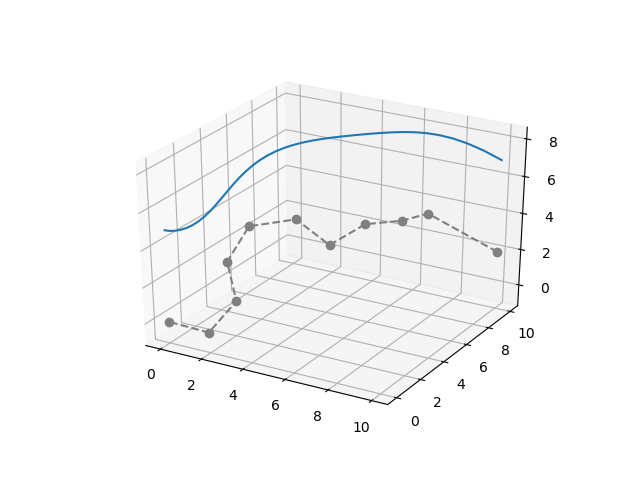

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(points[:, 0], points[:, 1], points[:, 2],
        marker='o', linestyle='--', color='grey')
ax.plot(curve[:,0], curve[:,1], curve[:,2])